In [2]:
import  tensorflow as tf
import  numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.python.framework import ops

In [3]:
sess = tf.Session()
iris=datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])



In [4]:
learning_rate = 0.05
batch_size=20
x_data=tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
A=tf.Variable(tf.random_normal(shape=[1,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))
#y=ax+b

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model_output=tf.add(tf.matmul(x_data,A),b);
loss=tf.reduce_mean(tf.square(y_target-model_output))
init=tf.global_variables_initializer()
sess.run(init)


In [11]:
my_opt=tf.train.GradientDescentOptimizer(learning_rate)
train_step=my_opt.minimize(loss)

In [16]:
loss_vec=[]
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
      print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
      print('Loss = ''' + str(temp_loss))

Step #25 A = [[0.857008]]b = [[4.744436]]
Loss = 0.2912414
Step #50 A = [[0.867172]]b = [[4.75215]]
Loss = 0.2044766
Step #75 A = [[0.91149163]]b = [[4.7694626]]
Loss = 0.34336004
Step #100 A = [[0.8574569]]b = [[4.7655907]]
Loss = 0.15364772


In [17]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
 best_fit.append(slope*i+y_intercept)



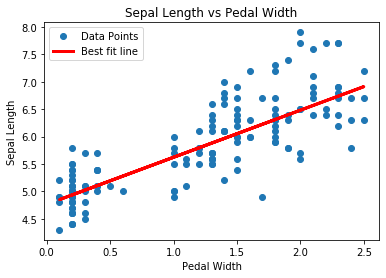

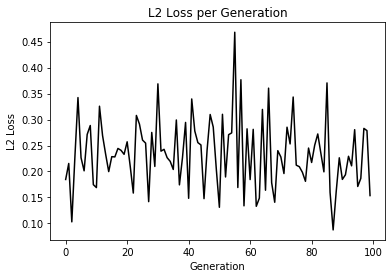

In [18]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

